# CHAMPO CARPETS: IMPROVING BUSINESS-TO-BUSINESS SALES USING MACHINE LEARNING ALGORITHMS

**Donya Razinejad:**

Data Preprocessing , Visualization, Time Series Model for Demand Predictions, Regression Models


**Reyhane Alimohammadi:**

Clustering, Recommendation System for Suggesting Correct Products to Target Customers


## Data Preprocesing 

In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_df = pd.read_excel('IMB881.xlsx',sheet_name='Raw Data-Order and Sample')
sample_df = pd.read_excel('IMB881.xlsx',sheet_name='Data on Sample ONLY')

In [3]:
raw_df.head()

,OrderType,OrderCategory,CustomerCode,CountryName,CustomerOrderNo,Custorderdate,UnitName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt
0,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,6.00,12.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,6.00
1,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,9.00,18.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,9.00
2,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,54.00,108.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,54.00
3,Area Wise,Order,H-1,USA,1918436,2017-02-01,Ft,5,54.00,270.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,54.00
4,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,5,71.25,356.25,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,71.25


In [4]:
sample_df.head()

,CustomerCode,CountryName,USA,UK,Italy,Belgium,Romania,Australia,India,QtyRequired,...,Knotted,Jacquard,Handloom,Other,ShapeName,REC,Round,Square,AreaFt,Order Conversion
0,CC,INDIA,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
1,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
2,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,0,0,0,0,REC,1,0,0,80.0,1
3,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
4,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18955 entries, 0 to 18954
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderType        18955 non-null  object        
 1   OrderCategory    18955 non-null  object        
 2   CustomerCode     18955 non-null  object        
 3   CountryName      18955 non-null  object        
 4   CustomerOrderNo  18946 non-null  object        
 5   Custorderdate    18955 non-null  datetime64[ns]
 6   UnitName         18955 non-null  object        
 7   QtyRequired      18955 non-null  int64         
 8   TotalArea        18955 non-null  float64       
 9   Amount           18955 non-null  float64       
 10  ITEM_NAME        18955 non-null  object        
 11  QualityName      18955 non-null  object        
 12  DesignName       18955 non-null  object        
 13  ColorName        18955 non-null  object        
 14  ShapeName        18955 non-null  objec

In [6]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerCode      5820 non-null   object 
 1   CountryName       5820 non-null   object 
 2   USA               5781 non-null   float64
 3   UK                5781 non-null   float64
 4   Italy             5781 non-null   float64
 5   Belgium           5781 non-null   float64
 6   Romania           5781 non-null   float64
 7   Australia         5781 non-null   float64
 8   India             5781 non-null   float64
 9   QtyRequired       5820 non-null   int64  
 10  ITEM_NAME         5820 non-null   object 
 11  Hand Tufted       5820 non-null   int64  
 12  Durry             5820 non-null   int64  
 13  Double Back       5820 non-null   int64  
 14  Hand Woven        5820 non-null   int64  
 15  Knotted           5820 non-null   int64  
 16  Jacquard          5820 non-null   int64  


### Missing data: raw_df
- item names missing (4 lines with '-' )-> relate based on other parameters such as quality, design

In [7]:
raw_df.isnull().sum()

OrderType          0
OrderCategory      0
CustomerCode       0
CountryName        0
CustomerOrderNo    9
Custorderdate      0
UnitName           0
QtyRequired        0
TotalArea          0
Amount             0
ITEM_NAME          0
QualityName        0
DesignName         0
ColorName          0
ShapeName          0
AreaFt             0
dtype: int64

In [8]:
raw_df[raw_df['CustomerOrderNo'].isnull()] #NaN values in CustomerOrderNo

,OrderType,OrderCategory,CustomerCode,CountryName,CustomerOrderNo,Custorderdate,UnitName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt
6210,Pc Wise,Order,P-5,USA,NaN,2017-08-29,Ft,50,6.0,1005.0,HAND TUFTED,TUFTED 30C HARD TWIST,PAISELY [8874],MULTI,REC,6.0
6213,Pc Wise,Order,P-5,USA,NaN,2017-08-29,Ft,20,15.0,1005.0,HAND TUFTED,TUFTED 30C HARD TWIST,PAISELY [8874],MULTI,REC,15.0
6215,Pc Wise,Order,P-5,USA,NaN,2017-08-29,Ft,5,40.0,670.0,HAND TUFTED,TUFTED 30C HARD TWIST,PAISELY [8874],MULTI,REC,40.0
6217,Pc Wise,Order,P-5,USA,NaN,2017-08-29,Ft,10,80.0,2680.0,HAND TUFTED,TUFTED 30C HARD TWIST,PAISELY [8874],MULTI,REC,80.0
6219,Pc Wise,Order,P-5,USA,NaN,2017-08-29,Ft,50,3.0,502.5,HAND TUFTED,TUFTED 30C HARD TWIST,PAISELY [8874],MULTI,REC,3.0
6223,Pc Wise,Order,P-5,USA,NaN,2017-08-29,Ft,10,20.0,670.0,HAND TUFTED,TUFTED 30C HARD TWIST,PAISELY [8874],MULTI,REC,20.0
8957,Area Wise,Order,CC,INDIA,NaN,2018-04-05,Ft,1,6.0,0.0,HAND TUFTED,TUFTED 60C,10041,WHITE/DOVE,REC,6.0
8958,Area Wise,Order,CC,INDIA,NaN,2018-04-05,Ft,1,6.0,0.0,HAND TUFTED,TUFTED 60C,10041,GREY/INDIGO,REC,6.0
8959,Area Wise,Order,CC,INDIA,NaN,2018-04-05,Ft,1,6.0,0.0,HAND TUFTED,TUFTED 60C,10041,WHITE/PETAL,REC,6.0


Since the missing values for 'CustomerOrderNo' are indeed orders we would rename the null values based on 'CustomerCode' and 'CustomerDate'

In [9]:
def concat_values(row):
    if pd.isnull(row['CustomerOrderNo']):  # Check if Column_C is NaN
        return row['CustomerCode'] + ' ' + str(row['Custorderdate'])  # Concatenate Column_A and Column_B
    else:
        return row['CustomerOrderNo']  # Keep Column_C value if not NaN

In [10]:
raw_df['CustomerOrderNo'] = raw_df.apply(lambda row: concat_values(row), axis=1)

In [11]:
raw_df.iloc[[6210,6217,8957, 8958],:]

,OrderType,OrderCategory,CustomerCode,CountryName,CustomerOrderNo,Custorderdate,UnitName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt
6210,Pc Wise,Order,P-5,USA,P-5 2017-08-29 00:00:00,2017-08-29,Ft,50,6.0,1005.0,HAND TUFTED,TUFTED 30C HARD TWIST,PAISELY [8874],MULTI,REC,6.0
6217,Pc Wise,Order,P-5,USA,P-5 2017-08-29 00:00:00,2017-08-29,Ft,10,80.0,2680.0,HAND TUFTED,TUFTED 30C HARD TWIST,PAISELY [8874],MULTI,REC,80.0
8957,Area Wise,Order,CC,INDIA,CC 2018-04-05 00:00:00,2018-04-05,Ft,1,6.0,0.0,HAND TUFTED,TUFTED 60C,10041,WHITE/DOVE,REC,6.0
8958,Area Wise,Order,CC,INDIA,CC 2018-04-05 00:00:00,2018-04-05,Ft,1,6.0,0.0,HAND TUFTED,TUFTED 60C,10041,GREY/INDIGO,REC,6.0


In [12]:
raw_df.isnull().sum()

OrderType          0
OrderCategory      0
CustomerCode       0
CountryName        0
CustomerOrderNo    0
Custorderdate      0
UnitName           0
QtyRequired        0
TotalArea          0
Amount             0
ITEM_NAME          0
QualityName        0
DesignName         0
ColorName          0
ShapeName          0
AreaFt             0
dtype: int64

### Missing Values: sample_df

In [13]:
sample_df.isnull().sum()

CustomerCode         0
CountryName          0
USA                 39
UK                  39
Italy               39
Belgium             39
Romania             39
Australia           39
India               39
QtyRequired          0
ITEM_NAME            0
Hand Tufted          0
Durry                0
Double Back          0
Hand Woven           0
Knotted              0
Jacquard             0
Handloom             0
Other                0
ShapeName            0
REC                  0
Round                0
Square               0
AreaFt               0
Order Conversion     0
dtype: int64

In [14]:
#Observe row with missing values
sample_df[sample_df[['USA', 'UK', 'Italy', 'Belgium', 'Romania', 'Australia', 'India']].isnull().any(axis=1)]

,CustomerCode,CountryName,USA,UK,Italy,Belgium,Romania,Australia,India,QtyRequired,...,Knotted,Jacquard,Handloom,Other,ShapeName,REC,Round,Square,AreaFt,Order Conversion
75,F-2,POLAND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,0,0,0,REC,1,0,0,39.8125,1
433,E-2,CANADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,...,0,0,0,0,REC,1,0,0,6.0000,1
1192,E-2,CANADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1,0,0,REC,1,0,0,6.0000,1
1193,E-2,CANADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1,0,0,REC,1,0,0,6.0000,1
1194,E-2,CANADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1,0,0,REC,1,0,0,6.0000,0
1195,E-2,CANADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1,0,0,REC,1,0,0,6.0000,0
1196,E-2,CANADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1,0,0,REC,1,0,0,6.0000,1
1197,E-2,CANADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1,0,0,REC,1,0,0,6.0000,1
1198,E-2,CANADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1,0,0,REC,1,0,0,6.0000,1
1199,E-2,CANADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,0,1,0,0,REC,1,0,0,6.0000,1


In [15]:
sample_df['CountryName'].unique()

array(['INDIA', 'USA', 'AUSTRALIA', 'UK', 'POLAND', 'BELGIUM', 'CANADA',
       'ITALY', 'ROMANIA', 'UAE', 'SOUTH AFRICA', 'BRAZIL', 'CHINA',
       'ISRAEL'], dtype=object)

In [16]:
sample_df['CountryName'].value_counts()

INDIA           3941
USA             1430
UK               203
BELGIUM          132
ITALY             45
ROMANIA           20
CANADA            14
AUSTRALIA         10
SOUTH AFRICA      10
BRAZIL             5
ISRAEL             4
POLAND             3
UAE                2
CHINA              1
Name: CountryName, dtype: int64

In [17]:
sample_df.columns

Index(['CustomerCode', 'CountryName', 'USA', 'UK', 'Italy', 'Belgium',
       'Romania', 'Australia', 'India', 'QtyRequired', 'ITEM_NAME',
       'Hand Tufted', 'Durry', 'Double Back', 'Hand Woven', 'Knotted',
       'Jacquard', 'Handloom', 'Other', 'ShapeName', 'REC', 'Round', 'Square',
       'AreaFt', 'Order Conversion'],
      dtype='object')

Since the missing data is already contained in the 'CountryName' column, we have chosen to delete the columns 'USA', 'UK', 'Italy', 'Belgium', 'Romania', 'Australia', and 'India'. This information duplicates what's already present (similar to one-hot encoding), but it's incomplete as it does not cover all countries, such as 'Poland', 'Canada', and others.

In [18]:
sample_df.drop( ['USA', 'UK', 'Italy', 'Belgium','Romania', 'Australia', 'India'], axis=1,inplace=True)

In [19]:
sample_df.head()

,CustomerCode,CountryName,QtyRequired,ITEM_NAME,Hand Tufted,Durry,Double Back,Hand Woven,Knotted,Jacquard,Handloom,Other,ShapeName,REC,Round,Square,AreaFt,Order Conversion
0,CC,INDIA,1,HAND TUFTED,1,0,0,0,0,0,0,0,REC,1,0,0,80.0,1
1,M-1,USA,1,HAND TUFTED,1,0,0,0,0,0,0,0,REC,1,0,0,80.0,1
2,M-1,USA,2,HAND TUFTED,1,0,0,0,0,0,0,0,REC,1,0,0,80.0,1
3,M-1,USA,1,HAND TUFTED,1,0,0,0,0,0,0,0,REC,1,0,0,80.0,1
4,M-1,USA,1,HAND TUFTED,1,0,0,0,0,0,0,0,REC,1,0,0,80.0,1


### Duplicated Values: raw_df

In [20]:
raw_df[raw_df.duplicated()]

,OrderType,OrderCategory,CustomerCode,CountryName,CustomerOrderNo,Custorderdate,UnitName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt
1525,Area Wise,Order,M-1,USA,12985,2018-08-06,Ft,1,80.0,256.0,HANDWOVEN,SHAGGY 00C FELTED V/V,TEXTURE LOOP,IVORY,REC,80.0
5368,Area Wise,Order,E-2,CANADA,592229,2017-06-13,Ft,2,24.0,48.0,DOUBLE BACK,D.B. VISCOSE 2/16 5PLY,TIP SHEARD,GREY,REC,24.0
5727,Area Wise,Order,M-1,USA,12696,2018-01-12,Ft,1,54.0,172.8,HANDWOVEN,SHAGGY 00C FELTED V/V,TEXTURE LOOP,SAND,REC,54.0
12150,Area Wise,Sample,H-2,USA,SAMPLE_29-NOV4,2018-11-29,Ft,1,40.0,0.0,HAND TUFTED,TUFTED 60C ALL LOOP,10110 [FABRIC],CHARCOAL,REC,40.0
12152,Area Wise,Sample,H-2,USA,SAMPLE_29-NOV4,2018-11-29,Ft,1,40.0,0.0,HAND TUFTED,TUFTED 60C ALL LOOP,10110 [FABRIC],SEAFOM,REC,40.0
14353,Area Wise,Order,E-2,CANADA,623559,2019-04-05,Ft,2,24.0,172.8,DOUBLE BACK,D.B. 30C MS W/V,CUT & BIND,CARBON,REC,24.0


We have 6 distinct pairs of duplicated values (total 12 lines). We will proceed to remove the duplicated values. 
Further information about the customer order, like order line or reference, migth be helpful for the company to have further information if it indeed it is a duplicated value or the customer order two times the same item with.

In [21]:
df = raw_df.drop_duplicates()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18949 entries, 0 to 18954
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderType        18949 non-null  object        
 1   OrderCategory    18949 non-null  object        
 2   CustomerCode     18949 non-null  object        
 3   CountryName      18949 non-null  object        
 4   CustomerOrderNo  18949 non-null  object        
 5   Custorderdate    18949 non-null  datetime64[ns]
 6   UnitName         18949 non-null  object        
 7   QtyRequired      18949 non-null  int64         
 8   TotalArea        18949 non-null  float64       
 9   Amount           18949 non-null  float64       
 10  ITEM_NAME        18949 non-null  object        
 11  QualityName      18949 non-null  object        
 12  DesignName       18949 non-null  object        
 13  ColorName        18949 non-null  object        
 14  ShapeName        18949 non-null  objec

### Duplicated Values: sample_df

In [23]:
sample_df[sample_df.duplicated()]

,CustomerCode,CountryName,QtyRequired,ITEM_NAME,Hand Tufted,Durry,Double Back,Hand Woven,Knotted,Jacquard,Handloom,Other,ShapeName,REC,Round,Square,AreaFt,Order Conversion
3,M-1,USA,1,HAND TUFTED,1,0,0,0,0,0,0,0,REC,1,0,0,80.0000,1
4,M-1,USA,1,HAND TUFTED,1,0,0,0,0,0,0,0,REC,1,0,0,80.0000,1
6,CC,INDIA,1,DOUBLE BACK,0,0,1,0,0,0,0,0,REC,1,0,0,80.0000,1
15,V-1,USA,35,KNOTTED,0,0,0,0,1,0,0,0,REC,1,0,0,1.0000,0
16,V-1,USA,35,KNOTTED,0,0,0,0,1,0,0,0,REC,1,0,0,1.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5814,CC,INDIA,1,HANDWOVEN,0,0,0,1,0,0,0,0,REC,1,0,0,24.0000,0
5815,T-2,ITALY,1,HAND TUFTED,1,0,0,0,0,0,0,0,REC,1,0,0,2.7778,0
5816,T-2,ITALY,1,HAND TUFTED,1,0,0,0,0,0,0,0,REC,1,0,0,2.7778,0
5817,T-2,ITALY,1,HAND TUFTED,1,0,0,0,0,0,0,0,REC,1,0,0,2.7778,0


This list comprises samples filtered from the raw dataset, but it lacks various attributes such as dates, customer orders, etc., essential for distinguishing between different samples. Therefore, we will leave it as is. Our primary focus for this dataframe will be to conduct an analysis on the conversion rate.

## Exploratiory Data Analysis

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

### EDA: Customer Data

In [25]:
# Number of unique customers
df['CustomerCode'].nunique()

46

In [26]:
# List of unique customer codes
print(df['CustomerCode'].unique())

['H-1' 'C-1' 'CC' 'M-1' 'E-2' 'B-3' 'G-1' 'M-2' 'P-5' 'T-2' 'I-2' 'RC'
 'T-6' 'JL' 'S-2' 'P-4' 'DR' 'PC' 'A-9' 'PD' 'K-2' 'T-5' 'T-4' 'A-6' 'B-2'
 'G-4' 'B-4' 'C-2' 'L-2' 'F-1' 'F-2' 'H-2' 'C-3' 'R-4' 'V-1' 'L-5' 'TGT'
 'A-11' 'N-1' 'CTS' 'S-3' 'L-4' 'L-3' 'K-3' 'F-6' 'T-9']


In [27]:
#Revenue per customer
df.groupby('CustomerCode')['Amount'].sum().reset_index().round(2).sort_values(by='Amount', ascending=False)

,CustomerCode,Amount
44,TGT,11341052.51
19,H-2,3804801.30
32,P-5,3066518.23
28,M-1,1959365.23
2,A-9,1592079.79
7,C-2,1557123.00
21,JL,1231578.28
30,N-1,949375.68
41,T-5,733832.95
6,C-1,567976.78


### EDA: Carpet categories

In [28]:
# Caspet categories
df['ITEM_NAME'].unique()

array(['HAND TUFTED', 'HANDWOVEN', 'DOUBLE BACK', 'JACQUARD', '-',
       'DURRY', 'KNOTTED', 'HANDLOOM', 'GUN TUFTED', 'INDO-TIBBETAN',
       'POWER LOOM JACQUARD', 'TABLE TUFTED'], dtype=object)

In [29]:
df['ITEM_NAME'].nunique()

12

We've identified 12 different categories/types of carpets, whereas the problem statement specifies only 4. We'll address this discrepancy later in the analysis
- Hand-tufted
- Hand-knotted
- Kilims
- Durries

In [30]:
#Item name with odd info
df[(df['ITEM_NAME']== '-')]

,OrderType,OrderCategory,CustomerCode,CountryName,CustomerOrderNo,Custorderdate,UnitName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt
217,Area Wise,Order,H-1,USA,1918436,2017-02-01,Ft,3,80.00,240.0,-,HANDWOVEN 8C FELTED W/V+V/V,CHUNKY BRAID,SILVER,REC,80.0000
3310,Area Wise,Order,JL,UK,117609,2017-02-23,Mtr,40,2.16,86.4,-,HANDWOVEN 8C FELTED W/V+V/V,CHUNKY BRAID,WHITE,REC,24.0000
3311,Area Wise,Order,JL,UK,117609,2017-02-23,Mtr,25,4.08,102.0,-,HANDWOVEN 8C FELTED W/V+V/V,CHUNKY BRAID,WHITE,REC,43.7361
4732,Area Wise,Order,M-1,USA,12339,2017-04-19,Ft,50,1.50,75.0,-,HANDWOVEN 8C FELTED W/V+V/V,CHUNKY BRAID,WHITE,REC,1.5000


Likewise, we've noticed there are 4 orders without an 'item_name' or product category. We plan to assign them based on the 'QualityName', as it indicates 'Handwoven,' which is already a category present in the dataset.

In [31]:
df.loc[df['ITEM_NAME'] == '-', 'ITEM_NAME'] = 'HANDWOVEN'

In [32]:
df['ITEM_NAME'].unique(),df['ITEM_NAME'].nunique()

(array(['HAND TUFTED', 'HANDWOVEN', 'DOUBLE BACK', 'JACQUARD', 'DURRY',
        'KNOTTED', 'HANDLOOM', 'GUN TUFTED', 'INDO-TIBBETAN',
        'POWER LOOM JACQUARD', 'TABLE TUFTED'], dtype=object),
 11)

In [33]:
df['ITEM_NAME'].value_counts()

HAND TUFTED            7093
DURRY                  4355
DOUBLE BACK            2472
HANDWOVEN              2332
KNOTTED                1575
JACQUARD                477
HANDLOOM                357
POWER LOOM JACQUARD     144
GUN TUFTED               91
TABLE TUFTED             42
INDO-TIBBETAN            11
Name: ITEM_NAME, dtype: int64

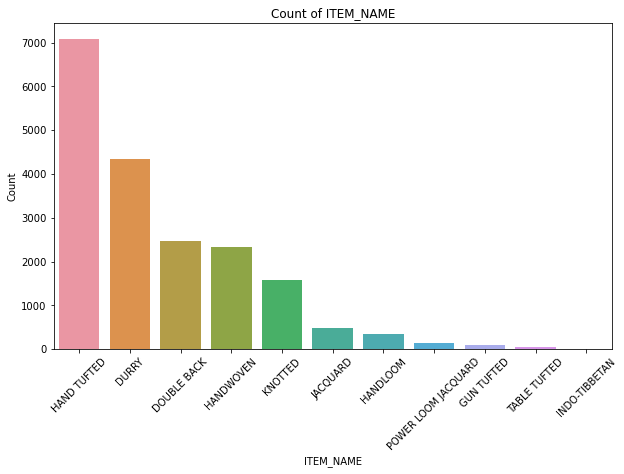

In [34]:
plt.figure(figsize=(10, 6))  
sns.countplot(data=df, x='ITEM_NAME', order=df['ITEM_NAME'].value_counts().index)
plt.title('Count of ITEM_NAME')
plt.xlabel('ITEM_NAME')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### EDA: Carpet colors

In [35]:
df['ColorName'].nunique()

815

In [36]:
df['ColorName'].unique()

array(['BEIGE', 'GREEN/IVORY', 'TERRA/BLUE', 'TERRA/IVORY', 'BLUE/BEIGE',
       'BEIGE/SAGE', 'BLUE', 'SAGE/GREEN', 'NAVY/BEIGE', 'BROWN', 'RUST',
       'BLACK', 'CHARCOAL', 'INDIGO', 'MUSHROOM', 'MULTI', 'DENIM',
       'LAVA', 'PETAL', 'IVORY/GREY', 'GREY/IVORY', 'PETAL/WHITE',
       'WHITE/IVORY', 'W.WHITE', 'DOVE', 'CREAM', 'IVORY', 'PRAIR',
       'SILVER', 'SLBL(AZURE)', 'GREY', 'AZURE', 'FOG', 'SKY', 'PEWTER',
       'PLAT', 'WHITE', 'CELDON', 'AZURE/CREAM', 'PLAT/CREAM',
       'MOCHA/BLACK', 'PLAT/NAVY', 'NAVY/GREY', 'GUNMETAL',
       'CHARCOAL/PINK', 'BLUE/GREEN', 'LT.BLUE/BROWN', 'BROWN/GOLD',
       'BLACK/BEIGE', 'BROWN/BEIGE', 'RED/BROWN', 'RUST/BEIGE',
       'ANTIQUE/IVORY', 'RED/IVORY', 'BLACK/IVORY', 'BLUE/IVORY',
       'BROWN/CREAM', 'IVORY/BLUE', 'GREY/SILVER', 'GREY/SEAGREEN',
       'GOLD/GOLD', 'BLACK/BLACK', 'BURGANDY/BURGANDY', 'BROWN/RED',
       'BLACK/BURGANDY', 'BEIGE/BROWN', 'G-1/G-2', 'MOCHA', 'SAND',
       'SAND/LT.TAUPE', 'GRAPHITE', 'GREY/WHITE',

In [37]:
df['ColorName'].value_counts()

GREY            1333
MULTI           1254
BLUE            1014
SILVER           743
BEIGE            648
                ... 
ARS-CR05           1
BLACK3/WHITE       1
NATURAL-27         1
WHITE/GOLD         1
LT.PINK            1
Name: ColorName, Length: 815, dtype: int64

We've noticed 815 distinct colors, and we'll address this issue in the analysis.

### EDA: Carpet shapes

In [38]:
df['ShapeName'].nunique()

5

In [39]:
df['ShapeName'].unique()

array(['REC', 'ROUND', 'SQUARE', 'OCTAGON', 'OVAL'], dtype=object)

In [40]:
df['ShapeName'].value_counts()

REC        18512
ROUND        362
SQUARE        72
OCTAGON        2
OVAL           1
Name: ShapeName, dtype: int64

### EDA: Order Type

In [41]:
df['OrderType'].value_counts()

Area Wise    14200
Pc Wise       4749
Name: OrderType, dtype: int64

### EDA: Order Category

In [42]:
df['OrderCategory'].value_counts()

Order     13131
Sample     5818
Name: OrderCategory, dtype: int64

### EDA: Customer Order Date

In [43]:
df = df.copy()
df['Custorderdate'] = pd.to_datetime(df['Custorderdate'])

In [44]:
df['Custorderdate'].min()

Timestamp('2017-01-16 00:00:00')

In [45]:
df['Custorderdate'].max()

Timestamp('2020-02-14 00:00:00')

In [46]:
df.groupby(df['Custorderdate'].dt.year)['Custorderdate'].count()

Custorderdate
2017    3978
2018    6657
2019    7401
2020     913
Name: Custorderdate, dtype: int64

In [47]:
df.groupby([df['Custorderdate'].dt.year, 'OrderCategory']).size().unstack(fill_value=0)

OrderCategory,Order,Sample
Custorderdate,,
2017,3978,0
2018,5080,1577
2019,3659,3742
2020,414,499


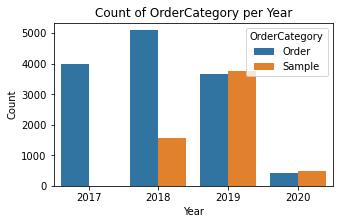

In [48]:
plt.figure(figsize=(5, 3))  
sns.countplot(data=df, x=df['Custorderdate'].dt.year, hue='OrderCategory')
plt.title('Count of OrderCategory per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='OrderCategory')
plt.show()

### EDA: Country Name

In [49]:
df['CountryName'].value_counts()

USA             10622
INDIA            4135
UK               1694
ITALY             596
ROMANIA           456
BELGIUM           346
AUSTRALIA         311
CANADA            285
LEBANON           168
BRAZIL            165
SOUTH AFRICA       94
CHINA              58
ISRAEL             12
UAE                 4
POLAND              3
Name: CountryName, dtype: int64

In [50]:
df.pivot_table(index='CountryName', columns='OrderCategory', aggfunc='size', fill_value=0).sort_values(by='Order', ascending=False)

OrderCategory,Order,Sample
CountryName,,
USA,9194,1428
UK,1491,203
ITALY,551,45
ROMANIA,436,20
AUSTRALIA,301,10
CANADA,271,14
BELGIUM,214,132
INDIA,194,3941
LEBANON,168,0


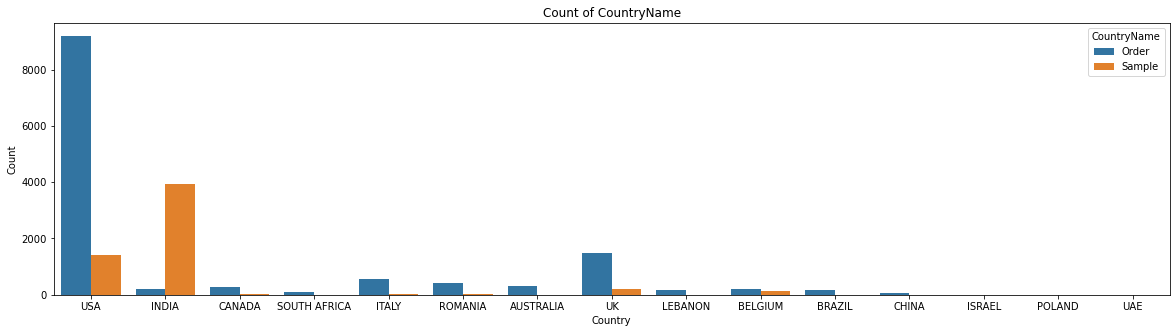

In [51]:
plt.figure(figsize=(20, 5)) 
sns.countplot(data=df, x=df['CountryName'], hue='OrderCategory')
plt.title('Count of CountryName')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='CountryName')
plt.show()

### EDA: Qty Required & AreaFT (Total Area of Order in ft)

In [52]:
df['QtyRequired'].value_counts()

1      5939
2      1981
3      1287
4      1143
10      960
       ... 
305       1
163       1
358       1
696       1
781       1
Name: QtyRequired, Length: 299, dtype: int64

In [53]:
df[['QtyRequired','AreaFt']].describe()

,QtyRequired,AreaFt
count,18949.000000,18949.000000
mean,31.425194,44.469769
std,191.479427,45.215363
min,1.000000,0.444400
25%,1.000000,8.437500
50%,4.000000,35.000000
75%,13.000000,64.736100
max,6400.000000,645.722200


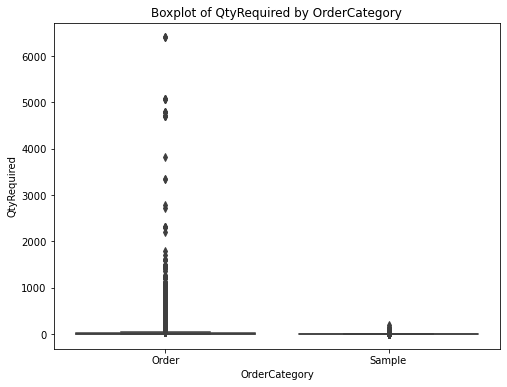

In [54]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(data=df, x='OrderCategory', y='QtyRequired')
plt.title('Boxplot of QtyRequired by OrderCategory')
plt.xlabel('OrderCategory')
plt.ylabel('QtyRequired')
plt.show()

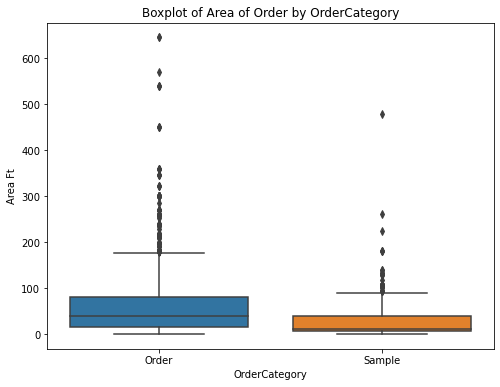

In [55]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(data=df, x='OrderCategory', y='AreaFt')
plt.title('Boxplot of Area of Order by OrderCategory')
plt.xlabel('OrderCategory')
plt.ylabel('Area Ft')
plt.show()

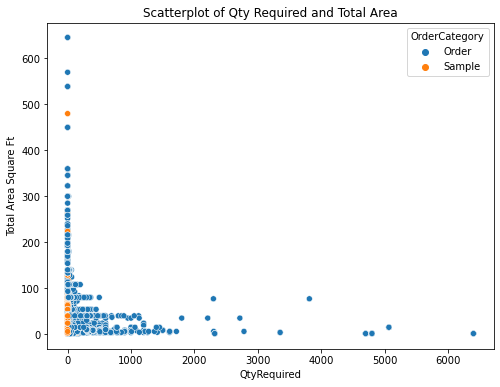

In [56]:
plt.figure(figsize=(8, 6))  # Adjust the figure size if needed
sns.scatterplot(data=df, y='AreaFt', x='QtyRequired', hue='OrderCategory')
plt.title('Scatterplot of Qty Required and Total Area')
plt.xlabel('QtyRequired')
plt.ylabel('Total Area Square Ft')
plt.show()

There is no apparent relationship between the quantity of the order and the total square footage of the orders, which is unexpected since conventional thinking would suggest that higher quantities ordered would correspond to a larger total area of the order. There's an unusual pattern observed where some orders exceed 2000 units in total quantity have less than 15 square feet in total area.

Given the absence of additional information to clarify this discrepancy, we've decided to disregard the quantity ordered in our analysis and focus solely on the square footage ordered instead.

In [57]:
df[df['AreaFt']>400]

,OrderType,OrderCategory,CustomerCode,CountryName,CustomerOrderNo,Custorderdate,UnitName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt
8744,Area Wise,Order,K-2,BRAZIL,16032018,2018-03-21,Mtr,1,50.0,950.0,DURRY,FLATWOVEN 30C/45C PET YARN,PET BRAID,BEIGE,REC,539.0139
8755,Area Wise,Order,K-2,BRAZIL,16032018,2018-03-21,Mtr,1,50.0,950.0,DURRY,FLATWOVEN 30C/45C PET YARN,PET BRAID,SILVER,REC,539.0139
8756,Area Wise,Order,K-2,BRAZIL,16032018,2018-03-21,Mtr,1,50.0,950.0,DURRY,FLATWOVEN 30C/45C PET YARN,PET BRAID,GREY,REC,539.0139
13337,Area Wise,Order,M-1,USA,BYS 300119,2019-02-01,Ft,1,570.0,2052.0,DOUBLE BACK,D.B. 30C MS W/V,CUT & BIND,LT GREY,REC,570.0000
13384,Area Wise,Order,B-3,USA,BOK 050219,2019-02-07,Ft,1,450.0,1732.5,JACQUARD,JACQUARD 60C 2PLY+VISCOSE 8PLY,NOUR,CHARCOAL/SILVER,REC,450.0000
13393,Area Wise,Order,B-3,USA,BOK 050219,2019-02-07,Ft,1,450.0,1732.5,DOUBLE BACK,D.B. 60C DP YARN,BOXES,CHARCOAL/SILVER,REC,450.0000
13394,Area Wise,Order,B-3,USA,BOK 050219,2019-02-07,Ft,1,450.0,1732.5,DOUBLE BACK,D.B. 60C DP YARN,BOXES,SILVER/CHARCOAL,REC,450.0000
16576,Area Wise,Order,K-2,BRAZIL,23082019,2019-08-27,Mtr,1,60.0,1140.0,DURRY,FLATWOVEN 30C/45C PET YARN,PET BRAID,BEIGE,REC,645.7222
16577,Area Wise,Order,K-2,BRAZIL,23082019,2019-08-27,Mtr,1,60.0,1140.0,DURRY,FLATWOVEN 30C/45C PET YARN,PET BRAID,SILVER,REC,645.7222
17419,Area Wise,Sample,M-1,USA,S 440,2019-11-01,Ft,1,480.0,0.0,DOUBLE BACK,D.B. 30C MS W/V,CUT & BIND,IRON,REC,480.0000


In [58]:
df[df['QtyRequired']>3000]

,OrderType,OrderCategory,CustomerCode,CountryName,CustomerOrderNo,Custorderdate,UnitName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt
15184,Pc Wise,Order,H-2,USA,708320,2019-06-07,Ft,4700,1.3611,4700.00,DURRY,FLATWOVEN JUTE,JUTE C07,NATURAL,ROUND,1.3611
15185,Pc Wise,Order,H-2,USA,743352,2019-09-26,Ft,4700,1.3611,4700.00,DURRY,FLATWOVEN JUTE,JUTE C07,NATURAL,ROUND,1.3611
16171,Pc Wise,Order,N-1,USA,P024598,2019-08-21,Ft,3813,77.0278,238579.41,DURRY,FLATWOVEN COTTON+8C,GOA LOOP [R45149],BLUE,REC,77.0278
17023,Pc Wise,Order,H-2,USA,743352,2019-09-26,Ft,4700,1.3611,4700.00,DURRY,FLATWOVEN JUTE,JUTE C08,BLACK-19/3917,ROUND,1.3611
17024,Pc Wise,Order,H-2,USA,743352,2019-09-26,Ft,4700,1.3611,4700.00,DURRY,FLATWOVEN JUTE,JUTE C09,GREY-18/3910,ROUND,1.3611
17027,Pc Wise,Order,H-2,USA,743352,2019-09-26,Ft,4700,1.3611,4700.00,DURRY,FLATWOVEN JUTE,JUTE C012,OCHRE-14/1036,ROUND,1.3611
17028,Pc Wise,Order,H-2,USA,743352,2019-09-26,Ft,4800,1.7153,6480.00,DURRY,FLATWOVEN JUTE,CHP-046,NATURAL,REC,1.7153
17030,Pc Wise,Order,H-2,USA,743352,2019-09-26,Ft,4800,1.7153,6480.00,DURRY,FLATWOVEN JUTE,CHP-047,BLACK,REC,1.7153
17095,Pc Wise,Order,L-5,USA,Q1 Promo Dummy order,2019-10-03,Ft,5067,15.0000,70938.00,DURRY,FLATWOVEN COTTON+8C,GOA LOOP(4109),BEIGE,REC,15.0000
17099,Pc Wise,Order,L-5,USA,Q1 Promo Dummy order,2019-10-03,Ft,5067,15.0000,70938.00,DURRY,FLATWOVEN COTTON,DREE(4116),GREY,REC,15.0000


### EDA: Relationship among: Revenue, Total Area, Item Category for Customer Orders

In [59]:
order_df = df[df['OrderCategory']=='Order']

In [60]:
order_df.head()

,OrderType,OrderCategory,CustomerCode,CountryName,CustomerOrderNo,Custorderdate,UnitName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt
0,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,6.00,12.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,6.00
1,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,9.00,18.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,9.00
2,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,54.00,108.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,54.00
3,Area Wise,Order,H-1,USA,1918436,2017-02-01,Ft,5,54.00,270.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,54.00
4,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,5,71.25,356.25,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,71.25


In [61]:
order_df['Amount'].describe()

count     13131.000000
mean       2392.719363
std       16834.609753
min           0.000000
25%         163.200000
50%         592.800000
75%        1540.000000
max      599719.680000
Name: Amount, dtype: float64

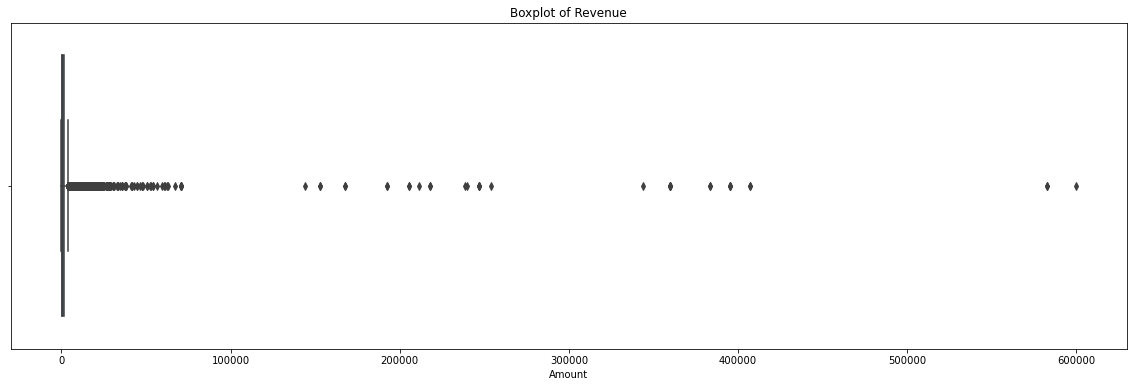

In [62]:
plt.figure(figsize=(20, 6))
sns.boxplot(x=order_df['Amount'])
plt.title('Boxplot of Revenue')
plt.xlabel('Amount')
plt.show()

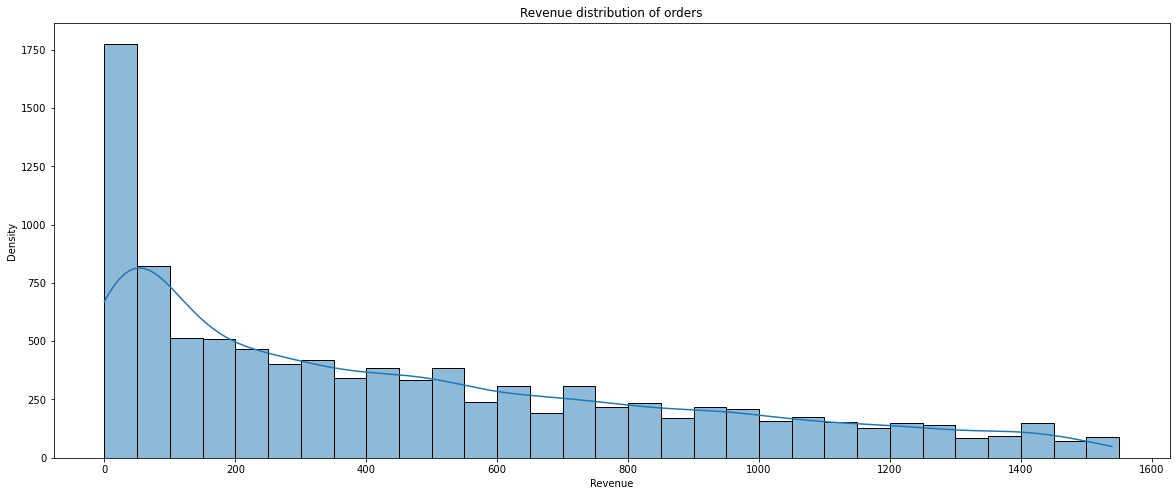

In [63]:
 #Distribution of 75% of the data, revenue being less than 1540
plt.figure(figsize=(20, 8))
sns.histplot(order_df[order_df['Amount'] < 1540]['Amount'], kde=True,binwidth=50)
plt.title('Revenue distribution of orders')
plt.xlabel('Revenue')
plt.ylabel('Density')
plt.show()

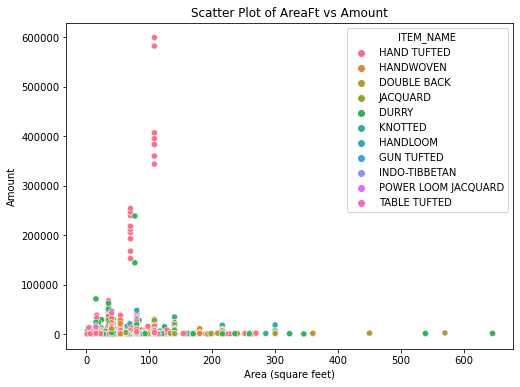

In [64]:
plt.figure(figsize=(8, 6)) 
sns.scatterplot(data=order_df, x='AreaFt', y='Amount',hue='ITEM_NAME')
plt.title('Scatter Plot of AreaFt vs Amount')
plt.xlabel('Area (square feet)')
plt.ylabel('Amount')
plt.show()

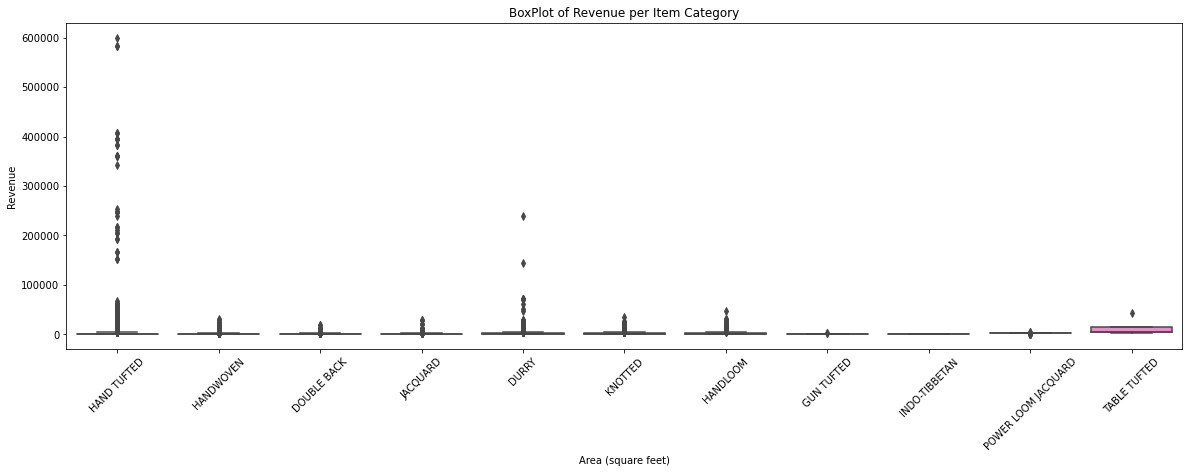

In [65]:
plt.figure(figsize=(20, 6)) 
sns.boxplot(data=order_df, x='ITEM_NAME', y='Amount')
plt.title('BoxPlot of Revenue per Item Category')
plt.xlabel('Area (square feet)')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [66]:
order_df.columns

Index(['OrderType', 'OrderCategory', 'CustomerCode', 'CountryName',
       'CustomerOrderNo', 'Custorderdate', 'UnitName', 'QtyRequired',
       'TotalArea', 'Amount', 'ITEM_NAME', 'QualityName', 'DesignName',
       'ColorName', 'ShapeName', 'AreaFt'],
      dtype='object')

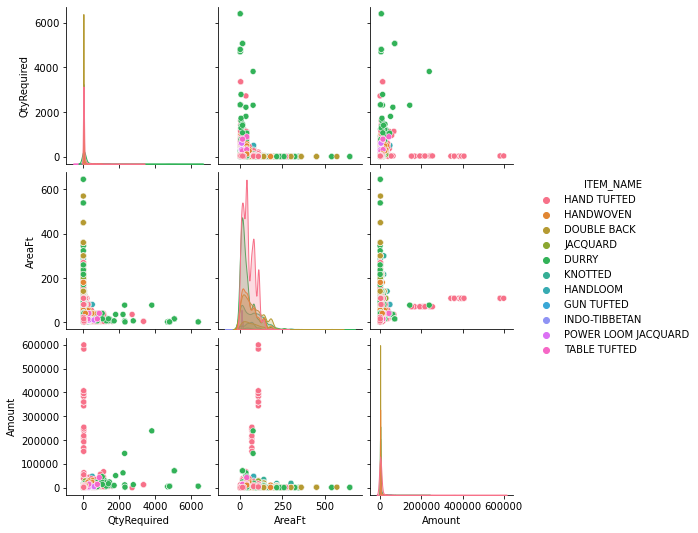

In [67]:
sns.pairplot(order_df[['QtyRequired','AreaFt','Amount','ITEM_NAME']],hue='ITEM_NAME')

### EDA: Sample_df

In [68]:
sample_df.head()

,CustomerCode,CountryName,QtyRequired,ITEM_NAME,Hand Tufted,Durry,Double Back,Hand Woven,Knotted,Jacquard,Handloom,Other,ShapeName,REC,Round,Square,AreaFt,Order Conversion
0,CC,INDIA,1,HAND TUFTED,1,0,0,0,0,0,0,0,REC,1,0,0,80.0,1
1,M-1,USA,1,HAND TUFTED,1,0,0,0,0,0,0,0,REC,1,0,0,80.0,1
2,M-1,USA,2,HAND TUFTED,1,0,0,0,0,0,0,0,REC,1,0,0,80.0,1
3,M-1,USA,1,HAND TUFTED,1,0,0,0,0,0,0,0,REC,1,0,0,80.0,1
4,M-1,USA,1,HAND TUFTED,1,0,0,0,0,0,0,0,REC,1,0,0,80.0,1


In [69]:
sample_df.describe()

,QtyRequired,Hand Tufted,Durry,Double Back,Hand Woven,Knotted,Jacquard,Handloom,Other,REC,Round,Square,AreaFt,Order Conversion
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,1.974914,0.416667,0.268557,0.095189,0.121134,0.037285,0.014433,0.017698,0.029038,0.986426,0.009794,0.003780,21.555815,0.200859
std,5.683137,0.493049,0.443247,0.293501,0.326311,0.189476,0.119278,0.131861,0.167927,0.115724,0.098486,0.061371,21.548281,0.400677
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.666700,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,39.812500,0.000000
max,200.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,480.000000,1.000000


In [70]:
sample_df['Order Conversion'].value_counts()

0    4651
1    1169
Name: Order Conversion, dtype: int64

In [71]:
pd.pivot_table(sample_df, index='CountryName', columns='Order Conversion', aggfunc='size', fill_value=0)

Order Conversion,0,1
CountryName,,
AUSTRALIA,7,3
BELGIUM,10,122
BRAZIL,5,0
CANADA,2,12
CHINA,1,0
INDIA,3400,541
ISRAEL,0,4
ITALY,35,10
POLAND,2,1


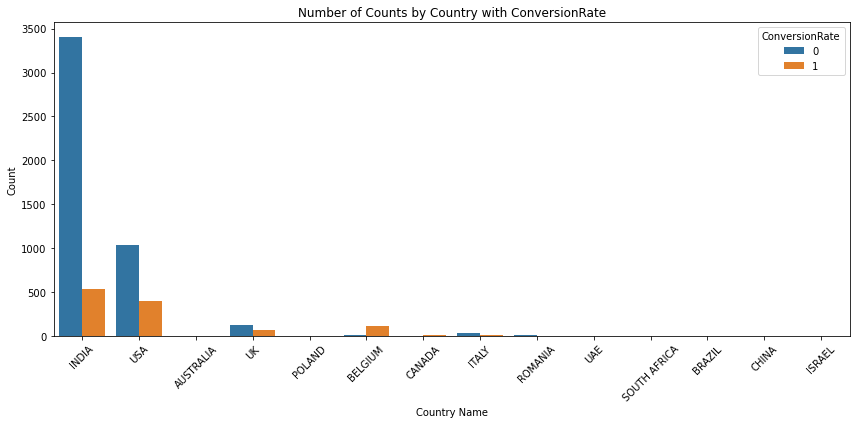

In [72]:
plt.figure(figsize=(12, 6))
sns.countplot(x='CountryName', hue='Order Conversion', data=sample_df)
plt.title('Number of Counts by Country with ConversionRate')
plt.xlabel('Country Name')
plt.ylabel('Count')
plt.legend(title='ConversionRate', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [73]:
pd.pivot_table(sample_df, index='ITEM_NAME', columns='Order Conversion', aggfunc='size', fill_value=0)

Order Conversion,0,1
ITEM_NAME,,
DOUBLE BACK,477,77
DURRY,1333,230
GUN TUFTED,20,17
HAND TUFTED,1967,458
HANDLOOM,79,24
HANDWOVEN,609,96
INDO-TIBBETAN,0,3
JACQUARD,64,20
KNOTTED,81,136


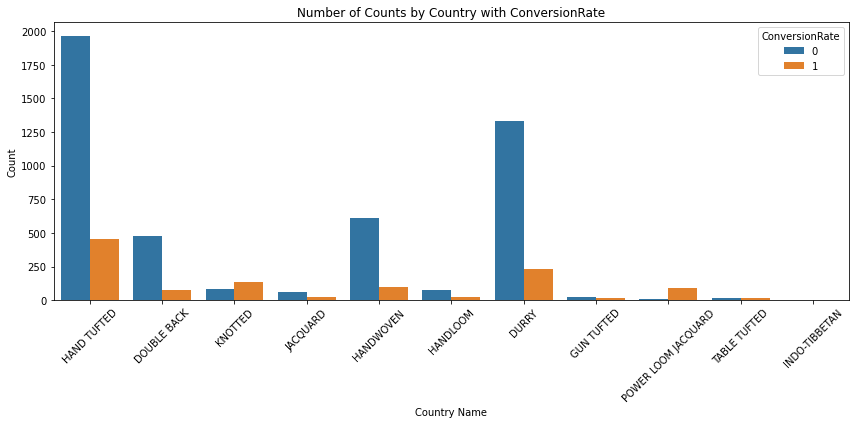

In [74]:
plt.figure(figsize=(12, 6))
sns.countplot(x='ITEM_NAME', hue='Order Conversion', data=sample_df)
plt.title('Number of Counts by Country with ConversionRate')
plt.xlabel('Country Name')
plt.ylabel('Count')
plt.legend(title='ConversionRate', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [75]:
pd.pivot_table(sample_df, index='ShapeName', columns='Order Conversion', aggfunc='size', fill_value=0)

Order Conversion,0,1
ShapeName,,
REC,4598,1143
ROUND,40,17
SQUARE,13,9


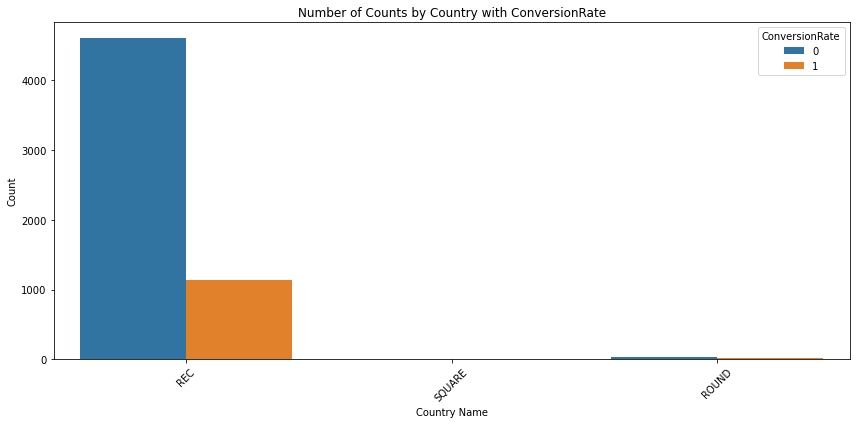

In [76]:
plt.figure(figsize=(12, 6))
sns.countplot(x='ShapeName', hue='Order Conversion', data=sample_df)
plt.title('Number of Counts by Country with ConversionRate')
plt.xlabel('Country Name')
plt.ylabel('Count')
plt.legend(title='ConversionRate', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Data Modeling



## Data for clustering carpet categories

During the exploratory data analysis (EDA), we observed no logical relationship between the quantity ordered and the total area of the order. Therefore, we will proceed with the analysis using the latter. However, as the original file suggests using quantity for clustering, we will perform the analysis with both variables. It is crucial to note that we will recreate the clustering dataset from the raw data. This decision is based on the inconsistency in the file's aggregation method concerning the area's unit. The file presents total area in both square feet and square meters across various clients without clear differentiation between the two units.

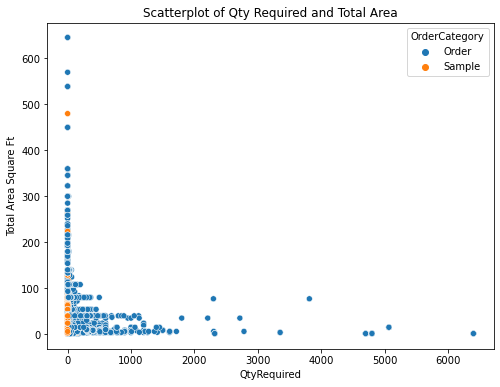

In [77]:
#Reminder
plt.figure(figsize=(8, 6)) 
sns.scatterplot(data=df, y='AreaFt', x='QtyRequired', hue='OrderCategory')
plt.title('Scatterplot of Qty Required and Total Area')
plt.xlabel('QtyRequired')
plt.ylabel('Total Area Square Ft')
plt.show()

The data below display orders with a 'QtyRequired' above 4000 units. In this scenario, if the total area per order is depicted in the dataset, the area per unit might not seem logical, given that the company deals with carpet products.

Moreover, the problem statement lacks specific information regarding whether the 'TotalArea' and 'AreaFt' represent the total area per order (obtained by multiplying 'QtyRequired' by the area per carpet).

Hence, we will assume that the 'TotalArea' and 'AreaFt' information pertains to the area per unit required. Subsequently, we will calculate the total area per order by multiplying the quantity per order with the area of each carpet. However, we will present models without making this assumptions.

In [78]:
df[df['QtyRequired']>4000]

,OrderType,OrderCategory,CustomerCode,CountryName,CustomerOrderNo,Custorderdate,UnitName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt
15184,Pc Wise,Order,H-2,USA,708320,2019-06-07,Ft,4700,1.3611,4700.0,DURRY,FLATWOVEN JUTE,JUTE C07,NATURAL,ROUND,1.3611
15185,Pc Wise,Order,H-2,USA,743352,2019-09-26,Ft,4700,1.3611,4700.0,DURRY,FLATWOVEN JUTE,JUTE C07,NATURAL,ROUND,1.3611
17023,Pc Wise,Order,H-2,USA,743352,2019-09-26,Ft,4700,1.3611,4700.0,DURRY,FLATWOVEN JUTE,JUTE C08,BLACK-19/3917,ROUND,1.3611
17024,Pc Wise,Order,H-2,USA,743352,2019-09-26,Ft,4700,1.3611,4700.0,DURRY,FLATWOVEN JUTE,JUTE C09,GREY-18/3910,ROUND,1.3611
17027,Pc Wise,Order,H-2,USA,743352,2019-09-26,Ft,4700,1.3611,4700.0,DURRY,FLATWOVEN JUTE,JUTE C012,OCHRE-14/1036,ROUND,1.3611
17028,Pc Wise,Order,H-2,USA,743352,2019-09-26,Ft,4800,1.7153,6480.0,DURRY,FLATWOVEN JUTE,CHP-046,NATURAL,REC,1.7153
17030,Pc Wise,Order,H-2,USA,743352,2019-09-26,Ft,4800,1.7153,6480.0,DURRY,FLATWOVEN JUTE,CHP-047,BLACK,REC,1.7153
17095,Pc Wise,Order,L-5,USA,Q1 Promo Dummy order,2019-10-03,Ft,5067,15.0000,70938.0,DURRY,FLATWOVEN COTTON+8C,GOA LOOP(4109),BEIGE,REC,15.0000
17099,Pc Wise,Order,L-5,USA,Q1 Promo Dummy order,2019-10-03,Ft,5067,15.0000,70938.0,DURRY,FLATWOVEN COTTON,DREE(4116),GREY,REC,15.0000
17103,Pc Wise,Order,L-5,USA,Q1 Promo Dummy order,2019-10-03,Ft,5067,15.0000,70938.0,DURRY,FLATWOVEN COTTON+10C,SOFIA(4123),BLACK,REC,15.0000


In [79]:
example = df[df['QtyRequired']>4000][['QtyRequired','TotalArea','AreaFt']]
example['AreaFt/Unit'] = example['AreaFt']/example['QtyRequired']
example

,QtyRequired,TotalArea,AreaFt,AreaFt/Unit
15184,4700,1.3611,1.3611,0.000290
15185,4700,1.3611,1.3611,0.000290
17023,4700,1.3611,1.3611,0.000290
17024,4700,1.3611,1.3611,0.000290
17027,4700,1.3611,1.3611,0.000290
17028,4800,1.7153,1.7153,0.000357
17030,4800,1.7153,1.7153,0.000357
17095,5067,15.0000,15.0000,0.002960
17099,5067,15.0000,15.0000,0.002960
17103,5067,15.0000,15.0000,0.002960


In [80]:
order_df = order_df.copy()  # Create a copy of the DataFrame
order_df['TotalAreaFt_Order'] = order_df.apply(lambda row: row['QtyRequired'] * row['AreaFt'], axis=1)

In [81]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13131 entries, 0 to 18942
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   OrderType          13131 non-null  object        
 1   OrderCategory      13131 non-null  object        
 2   CustomerCode       13131 non-null  object        
 3   CountryName        13131 non-null  object        
 4   CustomerOrderNo    13131 non-null  object        
 5   Custorderdate      13131 non-null  datetime64[ns]
 6   UnitName           13131 non-null  object        
 7   QtyRequired        13131 non-null  int64         
 8   TotalArea          13131 non-null  float64       
 9   Amount             13131 non-null  float64       
 10  ITEM_NAME          13131 non-null  object        
 11  QualityName        13131 non-null  object        
 12  DesignName         13131 non-null  object        
 13  ColorName          13131 non-null  object        
 14  ShapeN

In [82]:
pd.options.display.float_format = '{:,.2f}'.format
order_df['TotalAreaFt_Order'].describe()

count    13,131.00
mean      1,037.82
std       4,283.29
min           1.50
25%         108.00
50%         300.00
75%         750.50
max     293,707.00
Name: TotalAreaFt_Order, dtype: float64

In [83]:
order_df[order_df['TotalAreaFt_Order']>750]

,OrderType,OrderCategory,CustomerCode,CountryName,CustomerOrderNo,Custorderdate,UnitName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt,TotalAreaFt_Order
6,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,6,128.25,769.50,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],GREEN/IVORY,REC,128.25,769.50
7,Area Wise,Order,H-1,USA,1918436,2017-02-01,Ft,16,128.25,"2,052.00",HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],GREEN/IVORY,REC,128.25,"2,052.00"
31,Area Wise,Order,H-1,USA,2149526,2017-07-12,Ft,9,88.00,792.00,HAND TUFTED,TUFTED 60C,SYMPHONY [8900],SAGE/GREEN,REC,88.00,792.00
48,Area Wise,Order,H-1,USA,1918436,2017-02-01,Ft,21,71.25,"1,496.25",HAND TUFTED,TUFTED 60C,GOVERNOR [9014],BROWN,REC,71.25,"1,496.25"
80,Area Wise,Order,M-1,USA,12761,2018-02-27,Ft,11,80.00,"1,760.00",HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY,AMARI TRELLIS,IVORY/GREY,REC,80.00,880.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18934,Pc Wise,Order,A-9,USA,FEB POHO 2020,2020-02-12,Ft,61,15.00,"2,196.00",HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY,10724(OCTAVIA RUG),MULTI,REC,15.00,915.00
18935,Pc Wise,Order,A-9,USA,FEB POHO 2020,2020-02-12,Ft,50,80.00,"9,600.00",HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY,10724(OCTAVIA RUG),MULTI,REC,80.00,"4,000.00"
18936,Pc Wise,Order,A-9,USA,FEB POHO 2020,2020-02-12,Ft,26,108.00,"6,739.20",HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY,10724(OCTAVIA RUG),MULTI,REC,108.00,"2,808.00"
18940,Pc Wise,Order,A-9,USA,FEB POHO 2020,2020-02-12,Ft,15,80.00,"4,740.00",HAND TUFTED,TUFTED 60C+VISC 2/16 5PLY LOOP/CUT,10736(LAHLEY RUG),MULTI,REC,80.00,"1,200.00"


## Color classification

As stated in the EDA, we have over 800 different colors in the data set. We are going to perform a classification of the colors and 

In [109]:
raw_df['ColorName'].unique()

array(['BEIGE', 'GREEN/IVORY', 'TERRA/BLUE', 'TERRA/IVORY', 'BLUE/BEIGE',
       'BEIGE/SAGE', 'BLUE', 'SAGE/GREEN', 'NAVY/BEIGE', 'BROWN', 'RUST',
       'BLACK', 'CHARCOAL', 'INDIGO', 'MUSHROOM', 'MULTI', 'DENIM',
       'LAVA', 'PETAL', 'IVORY/GREY', 'GREY/IVORY', 'PETAL/WHITE',
       'WHITE/IVORY', 'W.WHITE', 'DOVE', 'CREAM', 'IVORY', 'PRAIR',
       'SILVER', 'SLBL(AZURE)', 'GREY', 'AZURE', 'FOG', 'SKY', 'PEWTER',
       'PLAT', 'WHITE', 'CELDON', 'AZURE/CREAM', 'PLAT/CREAM',
       'MOCHA/BLACK', 'PLAT/NAVY', 'NAVY/GREY', 'GUNMETAL',
       'CHARCOAL/PINK', 'BLUE/GREEN', 'LT.BLUE/BROWN', 'BROWN/GOLD',
       'BLACK/BEIGE', 'BROWN/BEIGE', 'RED/BROWN', 'RUST/BEIGE',
       'ANTIQUE/IVORY', 'RED/IVORY', 'BLACK/IVORY', 'BLUE/IVORY',
       'BROWN/CREAM', 'IVORY/BLUE', 'GREY/SILVER', 'GREY/SEAGREEN',
       'GOLD/GOLD', 'BLACK/BLACK', 'BURGANDY/BURGANDY', 'BROWN/RED',
       'BLACK/BURGANDY', 'BEIGE/BROWN', 'G-1/G-2', 'MOCHA', 'SAND',
       'SAND/LT.TAUPE', 'GRAPHITE', 'GREY/WHITE',

## Linear Regression
The purpose of this section is to calculate the anticipated revenue using linear regression based on quantities and sold areas per carpet category.

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [85]:
cluster_df = pd.get_dummies(order_df, columns=['ITEM_NAME'],prefix='CAT')

In [86]:
cluster_df.drop(['OrderType', 'CustomerOrderNo','OrderCategory', 'CountryName','TotalArea','UnitName','UnitName','QualityName', 'DesignName', 'ColorName',
       'ShapeName', 'AreaFt'],axis=1, inplace=True)

In [87]:
cluster_df.head()

,CustomerCode,Custorderdate,QtyRequired,Amount,TotalAreaFt_Order,CAT_DOUBLE BACK,CAT_DURRY,CAT_GUN TUFTED,CAT_HAND TUFTED,CAT_HANDLOOM,CAT_HANDWOVEN,CAT_INDO-TIBBETAN,CAT_JACQUARD,CAT_KNOTTED,CAT_POWER LOOM JACQUARD,CAT_TABLE TUFTED
0,H-1,2017-01-16,2,12.00,12.00,0,0,0,1,0,0,0,0,0,0,0
1,H-1,2017-01-16,2,18.00,18.00,0,0,0,1,0,0,0,0,0,0,0
2,H-1,2017-01-16,2,108.00,108.00,0,0,0,1,0,0,0,0,0,0,0
3,H-1,2017-02-01,5,270.00,270.00,0,0,0,1,0,0,0,0,0,0,0
4,H-1,2017-01-16,5,356.25,356.25,0,0,0,1,0,0,0,0,0,0,0


In [88]:
cluster_df.describe()

,QtyRequired,Amount,TotalAreaFt_Order,CAT_DOUBLE BACK,CAT_DURRY,CAT_GUN TUFTED,CAT_HAND TUFTED,CAT_HANDLOOM,CAT_HANDWOVEN,CAT_INDO-TIBBETAN,CAT_JACQUARD,CAT_KNOTTED,CAT_POWER LOOM JACQUARD,CAT_TABLE TUFTED
count,"13,131.00","13,131.00","13,131.00","13,131.00","13,131.00","13,131.00","13,131.00","13,131.00","13,131.00","13,131.00","13,131.00","13,131.00","13,131.00","13,131.00"
mean,44.47,"2,392.72","1,037.82",0.15,0.21,0.00,0.36,0.02,0.12,0.00,0.03,0.10,0.00,0.00
std,228.78,"16,834.61","4,283.29",0.35,0.41,0.06,0.48,0.14,0.33,0.02,0.17,0.30,0.06,0.03
min,1.00,0.00,1.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,163.20,108.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,8.00,592.80,300.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,20.00,"1,540.00",750.50,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
max,"6,400.00","599,719.68","293,707.00",1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [89]:
cluster_df.columns

Index(['CustomerCode', 'Custorderdate', 'QtyRequired', 'Amount',
       'TotalAreaFt_Order', 'CAT_DOUBLE BACK', 'CAT_DURRY', 'CAT_GUN TUFTED',
       'CAT_HAND TUFTED', 'CAT_HANDLOOM', 'CAT_HANDWOVEN', 'CAT_INDO-TIBBETAN',
       'CAT_JACQUARD', 'CAT_KNOTTED', 'CAT_POWER LOOM JACQUARD',
       'CAT_TABLE TUFTED'],
      dtype='object')

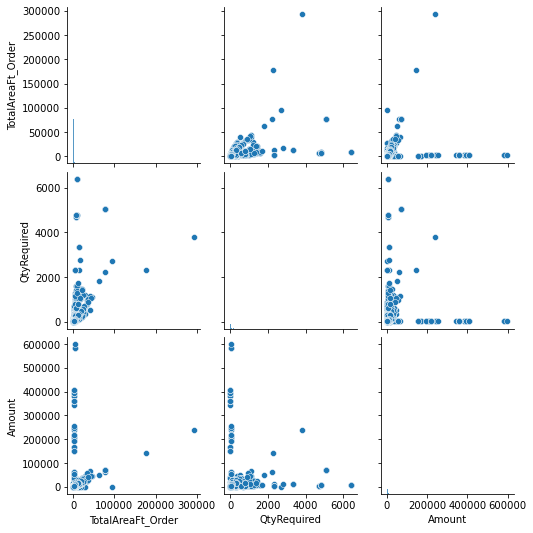

In [90]:
sns.pairplot(cluster_df[['TotalAreaFt_Order', 'QtyRequired', 'Amount']])

### Train Test Split

In [91]:
X = cluster_df.drop(['CustomerCode','Custorderdate','Amount'],axis=1)
y = cluster_df['Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Training and Evaluating the Model

In [92]:
lm = LinearRegression().fit(X_train,y_train)

In [93]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

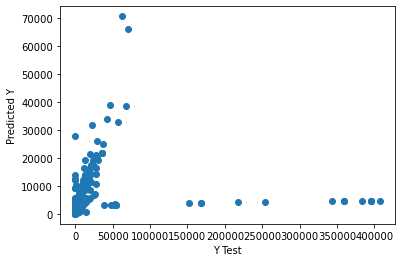

In [94]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [96]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R^2 Score:", metrics.r2_score(y_test, predictions))

MAE: 2372.541180037329
MSE: 341208891.5335592
RMSE: 18471.840502060404
R^2 Score: 0.04155448757439806


C:\Users\erick\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


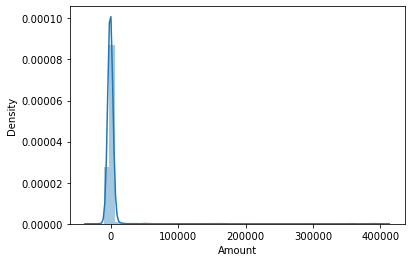

In [97]:
sns.distplot((y_test-predictions),bins=50);

In [99]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
QtyRequired,-1.20
TotalAreaFt_Order,0.94
CAT_DOUBLE BACK,-336.86
CAT_DURRY,-420.68
CAT_GUN TUFTED,-642.61
CAT_HAND TUFTED,"1,691.00"
CAT_HANDLOOM,702.89
CAT_HANDWOVEN,-244.72
CAT_INDO-TIBBETAN,-666.12
CAT_JACQUARD,-142.32


We are going to drop area (which is an assumption)

### Linear Regression 

In [100]:
X = cluster_df.drop(['CustomerCode','Custorderdate','Amount','TotalAreaFt_Order'],axis=1)
y = cluster_df['Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [101]:
lm = LinearRegression().fit(X_train,y_train)
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

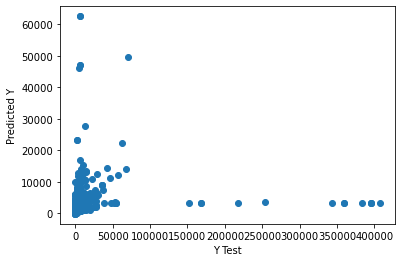

In [102]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [107]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("R^2 Score:", metrics.r2_score(y_test, predictions))

MAE: 3030.7578502172605
MSE: 352806660.4434547
RMSE: 18783.148310212924
R^2 Score: 0.008976703578563283


In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

In [104]:
from sklearn.model_selection import cross_val_score

In [105]:
model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

In [106]:
print("Cross-Validation Scores:", scores)
print("Mean R^2 Score:", np.mean(scores))

Cross-Validation Scores: [-1.5088566  -0.90753352 -0.02093236 -0.01167706 -0.35501331]
Mean R^2 Score: -0.5608025707634839


In [ ]:
# Compute 'data for clustering' from raw data -> predict revenue based on qty sold per product category
cluster_qty = pd.concat(
    objs=[
        order_df.groupby('CustomerCode')[['QtyRequired','TotalAreaFt_Order','Amount']].sum().round(2),
        order_df.pivot_table(index='CustomerCode', columns='ITEM_NAME', values='QtyRequired', aggfunc=np.sum, fill_value=0)
    ],
    axis=1)
cluster_qty

In [ ]:
# Compute 'data for clustering' from raw data -> predict revenue based on square feets sold per product category
cluster_area = pd.concat(
    objs=[
        order_df.groupby('CustomerCode')[['QtyRequired','AreaFt','Amount']].sum().round(2),
        order_df.pivot_table(index='CustomerCode', columns='ITEM_NAME', values='AreaFt', aggfunc=np.sum, fill_value=0)
    ],
    axis=1)
cluster_area

## Classification to predict conversion rate

### Preparing  data

In [115]:
sample_df.head()

,CustomerCode,CountryName,QtyRequired,ITEM_NAME,Hand Tufted,Durry,Double Back,Hand Woven,Knotted,Jacquard,Handloom,Other,ShapeName,REC,Round,Square,AreaFt,Order Conversion
0,CC,INDIA,1,HAND TUFTED,1,0,0,0,0,0,0,0,REC,1,0,0,80.00,1
1,M-1,USA,1,HAND TUFTED,1,0,0,0,0,0,0,0,REC,1,0,0,80.00,1
2,M-1,USA,2,HAND TUFTED,1,0,0,0,0,0,0,0,REC,1,0,0,80.00,1
3,M-1,USA,1,HAND TUFTED,1,0,0,0,0,0,0,0,REC,1,0,0,80.00,1
4,M-1,USA,1,HAND TUFTED,1,0,0,0,0,0,0,0,REC,1,0,0,80.00,1


In [111]:
sample_df['Order Conversion'].value_counts()

0    4651
1    1169
Name: Order Conversion, dtype: int64

In [112]:
pd.get_dummies(sample_df['CustomerCode'])

,A-11,A-9,B-2,B-3,C-1,C-2,CC,CTS,E-2,F-1,...,P-5,PC,PD,RC,S-3,T-2,T-4,T-5,TGT,V-1
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
5818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
class_sample_df =  pd.concat([
    pd.get_dummies(sample_df['CustomerCode']),  # One-hot encode 'CustomerCode'
    sample_df.drop(['CustomerCode', 'CountryName', 'ITEM_NAME', 'ShapeName'], axis=1)  
], axis=1)

In [121]:
class_sample_df

,A-11,A-9,B-2,B-3,C-1,C-2,CC,CTS,E-2,F-1,...,Hand Woven,Knotted,Jacquard,Handloom,Other,REC,Round,Square,AreaFt,Order Conversion
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,80.00,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,80.00,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,80.00,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,80.00,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,80.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2.78,0
5816,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2.78,0
5817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2.78,0
5818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,480.00,1


### Classification without treating unbalance data in convertion rate

#### Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [123]:
X_train, X_test, y_train, y_test = train_test_split(class_sample_df.drop('Order Conversion',axis=1), 
                                                    class_sample_df['Order Conversion'], test_size=0.30, 
                                                    random_state=101)

In [131]:
X_train.shape,y_train.shape

((4074, 47), (4074,))

In [133]:
lrm = LogisticRegression(max_iter=10000).fit(X_train,y_train)

In [134]:
predictions = lrm.predict(X_test)

In [136]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1387
           1       0.77      0.65      0.70       359

    accuracy                           0.89      1746
   macro avg       0.84      0.80      0.82      1746
weighted avg       0.88      0.89      0.88      1746



#### Logistic Regression with cross-validation

In [145]:
from sklearn.model_selection import cross_val_predict

In [139]:
lrm_cv = LogisticRegression(max_iter=10000)

In [140]:
cross_val_scores = cross_val_score(lrm_cv,
                                    class_sample_df.drop('Order Conversion',axis=1),
                                    class_sample_df['Order Conversion'], cv=5)

In [141]:
print("Cross-validation scores:", cross_val_scores)
print("Mean CV score:", cross_val_scores.mean())

Cross-validation scores: [0.83934708 0.84879725 0.88487973 0.86683849 0.90034364]
Mean CV score: 0.868041237113402


In [146]:
predictions = cross_val_predict(lrm_cv,
                            class_sample_df.drop('Order Conversion',axis=1),
                            class_sample_df['Order Conversion'], cv=5)

In [147]:
print(classification_report(class_sample_df['Order Conversion'],predictions))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4651
           1       0.74      0.53      0.62      1169

    accuracy                           0.87      5820
   macro avg       0.82      0.74      0.77      5820
weighted avg       0.86      0.87      0.86      5820

